In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data_processing_functions import parameter_tuning_read_and_mean
csv_path = "/home/jens/masterData/AlgorithmTuner/Report/Baseline tuning/2021-03-05-12-45-03-AlgorithmTunerData-data.csv"
tested_parameter = "BL/Score Threshold"
# csv_path = "/home/jens/masterData/AlgorithmTuner/Report/Lit/UICS-Tuning-AlgorithmTunerData-data.csv"
# tested_parameter = "GEUICS/Inlier Overlap Penalty Factor"


df = pd.read_csv(csv_path,usecols=["algName","objName",tested_parameter,"tp","tn","fp","fn","f1","precision","recall","accuracy"],dtype={"algName":"category","objName":"category"})
df = df.groupby(["algName","objName",tested_parameter]).sum().reset_index()
df["precision"]=df["tp"]/(df["tp"]+df["fp"])
df["recall"]=df["tp"]/(df["tp"]+df["fn"])
df["f1"]=2*df["tp"]/(2*df["tp"]+df["fn"]+df["fp"])
df["accuracy"]=(df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df.head()

,algName,objName,BL/Score Threshold,tp,tn,fp,fn,precision,recall,accuracy,f1
0,BL,AngleTubes,0.00,349,0,211,0,0.623214,1.0,0.623214,0.767877
1,BL,AngleTubes,0.25,349,0,211,0,0.623214,1.0,0.623214,0.767877
2,BL,AngleTubes,0.50,349,0,211,0,0.623214,1.0,0.623214,0.767877
3,BL,AngleTubes,0.75,349,0,211,0,0.623214,1.0,0.623214,0.767877
4,BL,AngleTubes,1.00,349,0,211,0,0.623214,1.0,0.623214,0.767877


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


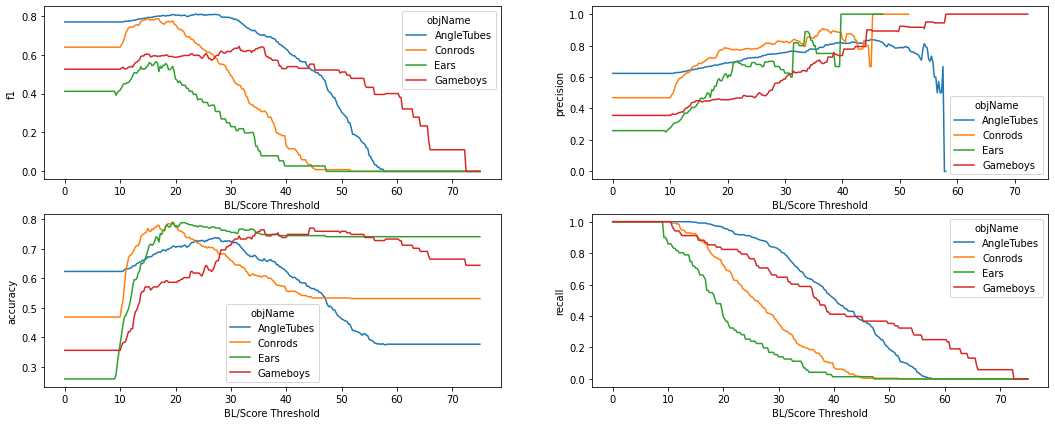

In [15]:

validation_measure = ["f1","precision","accuracy","recall"]
fig,axes = plt.subplots(2,2,figsize=(18,7),sharex = False)
for ax,vm in zip(axes.flatten(),validation_measure):
    sns.lineplot(x=tested_parameter,y=vm,hue="objName",data=df[df["algName"]=="BL"],ax=ax)
plt.tight_layout()
plt.savefig('report/bl_tuning.eps', format='eps')
plt.show()

In [3]:
tuning_measure = "f1"
max_idx = df.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))

AngleTubes,BLGA,Score Threshold,19.6
Conrods,BLGA,Score Threshold,15.0
Ears,BLGA,Score Threshold,13.8
Gameboys,BLGA,Score Threshold,25.5


In [6]:
tuning_measure = "f1"

#Mean
max_idx = df_mean.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df_mean.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))

#Standart deviation
max_idx = df_std.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df_std.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))

NameError: name 'df_mean' is not defined